In [3]:
from platform import python_version

print(python_version())

3.5.4


In [28]:
# Boilerplate: Import required packages
from py2cytoscape.data.cyrest_client import CyRestClient
from py2cytoscape.data.util_network import NetworkUtil as util
from py2cytoscape.data.style import StyleUtil as s_util
import py2cytoscape.cytoscapejs as renderer
from IPython.display import Image
import networkx as nx
from networkx.drawing import nx_pydot as pyd
import igraph as ig
import numpy as np
import pandas as pd
import matplotlib

In [5]:
# Create Client
cy = CyRestClient()
# Clear current session
cy.session.delete()

In [6]:

matrix1 = np.array([
    [0, 1, 1, 0],
    [0, 0, 1, 0],
    [0, 0, 0, 1],
    [0, 0, 0, 0]])

net1 = cy.network.create_from_ndarray(matrix1, name='binary sample')
cy.layout.apply(network=net1)
cy.layout.fit(network=net1)

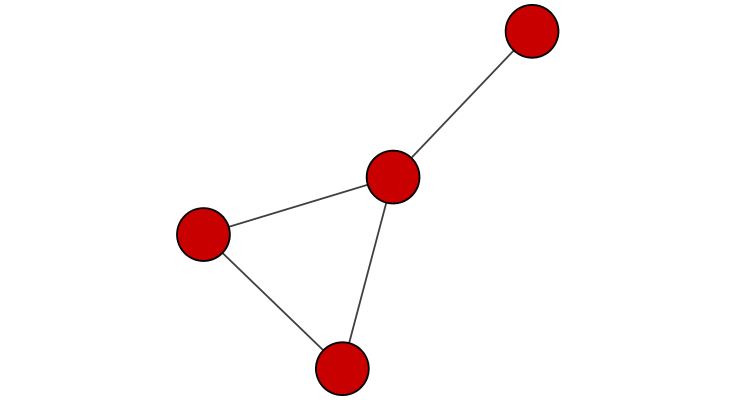

In [7]:
Image(net1.get_png(height=400))

In [8]:
# Create a random graph
matrix_size = 10
weighted = np.empty((matrix_size,matrix_size,))
weighted[:] = np.NAN

row_idx = 0
for row in weighted:
    idx = row_idx
    while idx < matrix_size:
        if idx != row_idx and np.random.randint(2):
            weighted[row_idx][idx] = np.random.randn()
        idx +=1
    row_idx += 1

# for printing
df = pd.DataFrame(weighted)
df.head(10)

,0,1,2,3,4,5,6,7,8,9
0,NaN,0.201088,0.557247,0.890852,1.427159,-1.611259,-0.242251,-0.506329,-0.762807,1.372543
1,NaN,NaN,1.267823,-0.192025,NaN,NaN,NaN,-0.634827,1.039181,NaN
2,NaN,NaN,NaN,NaN,2.187637,-0.489016,NaN,NaN,1.047197,0.341233
3,NaN,NaN,NaN,NaN,0.940000,-0.590579,-0.397577,0.873863,NaN,1.425987
4,NaN,NaN,NaN,NaN,NaN,-1.014662,NaN,0.257119,-0.176036,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.957398,-0.113584,0.152813
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.761872,-0.101258,0.728727
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
weight_min = weighted.min() 
weight_max = weighted.max() 
 
net2 = cy.network.create_from_ndarray(weighted, name='weighted sample', weighted=True)
cy.layout.apply(network=net2, name="circular")
cy.layout.fit(network=net2)

# Styling
style_s2 = cy.style.create('Sample2')

defaults = {    
    'NODE_SIZE': 12,
    'NODE_BORDER_WIDTH': 2,
    'NODE_LABEL_FONT_SIZE': 14,
    'NODE_LABEL_COLOR': '#555555',
    'EDGE_TRANSPARENCY': 100,
    'EDGE_STROKE_UNSELECTED_PAINT': '#999999',
    'NETWORK_BACKGROUND_PAINT': '#FFFFFF'
}
style_s2.update_defaults(defaults)
score_to_width = s_util.create_slope(min=weight_min, max=weight_max, values=(1, 8))
style_s2.create_continuous_mapping(column='weight', vp='EDGE_WIDTH', col_type='Double', points=score_to_width)
cy.style.apply(style=style_s2, network=net2)

C:\Users\ajshe\Anaconda3\envs\py2cyto_sandbox\lib\site-packages\numpy\core\_methods.py:32: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial)
C:\Users\ajshe\Anaconda3\envs\py2cyto_sandbox\lib\site-packages\numpy\core\_methods.py:28: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial)


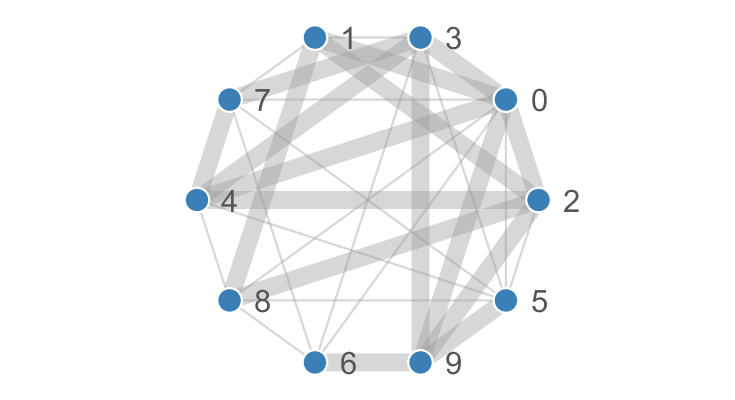

In [10]:
Image(net2.get_png(height=400))

In [11]:
d1 = np.random.randint(2, size=(10, 10))
dn1 = cy.network.create_from_ndarray(d1, name="Random")
cy.layout.apply(network=dn1, name="kamada-kawai")
style_s3 = cy.style.create('Sample3')
cy.style.apply(style=style_s3, network=dn1)

In [12]:
cy.network.create_from_ndarray(d1, name="Random")
#cy.network.create_from_ndarray(d1, name="Complete")

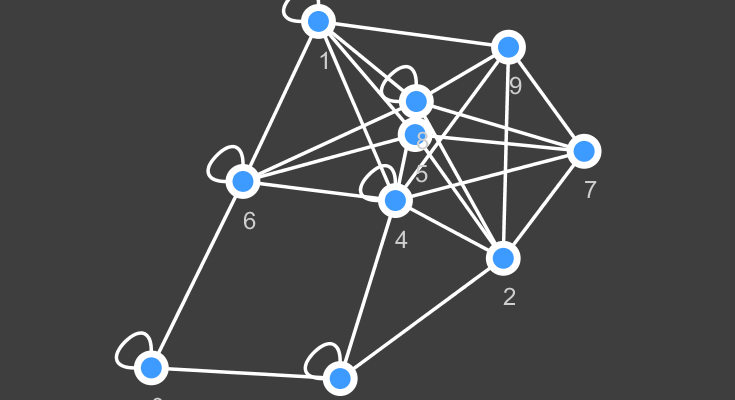

In [13]:
Image(dn1.get_png(height=400))

In [14]:
d2 = np.ones((100,100))
dn2 = cy.network.create_from_ndarray(d2, name="Complete")
cy.layout.apply(network=dn2, name="circular")
cy.layout.fit(network=dn2)

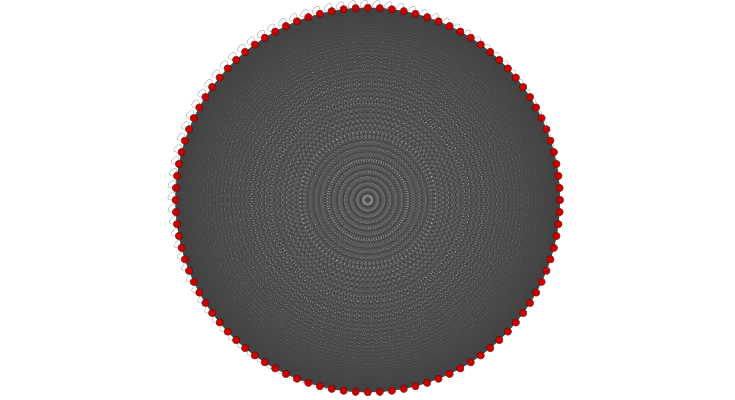

In [15]:
Image(dn2.get_png(height=400))

In [16]:
import os
import sys
import time
from py2cytoscape import cyrest
baseDir = os.path.abspath(os.path.join('..'))
visualization_scripts = os.path.join(baseDir, 'visualization_scripts')
sys.path.insert(1, visualization_scripts)
output = os.path.join(baseDir, 'htcondor_results', 'results_reproduce_egfr_tps_051320', 'output.sif')

style = os.path.join(baseDir, 'visualization_scripts', 'tps_style.xml')
# create cyrest client
cyy = cyrest.cyclient()
tps = cy.network.create_from(output)
print("---Done")
time.sleep(2)

# Step 3: Apply layout
# list of styles to apply
# only contains the one style loaded from style file
print("---apply style file")
style = cyy.vizmap.load_file(style)
print("---style name: ", style)
cyy.vizmap.apply(style[0])


---Done
---apply style file
---style name:  ['TPS']


{'views': [11420]}

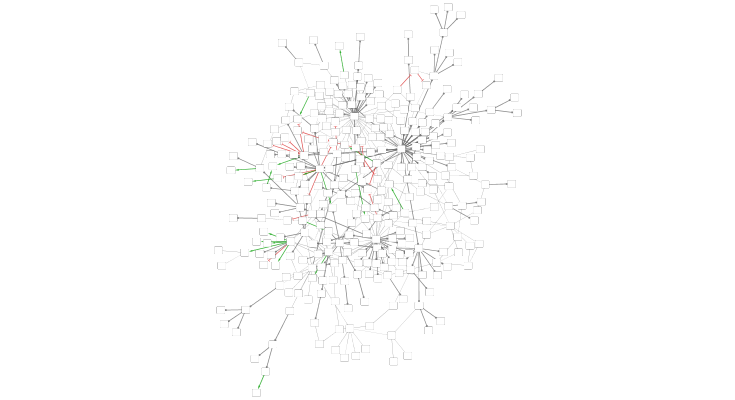

In [17]:
Image(tps.get_png(height=400))

In [21]:
data = pd.read_csv(output, names=['source', 'interaction','target'], delimiter="\t")
data

,source,interaction,target
0,EFNA5_HUMAN,N,EPHA7_HUMAN
1,HIPK2_HUMAN,A,DYR1B_HUMAN
2,NUCL_HUMAN,U,SUMO2_HUMAN
3,Q6FIE9_HUMAN,U,TM1L1_HUMAN
4,I2BP1_HUMAN,U,IRF2_HUMAN
...,...,...,...
408,CSK21_HUMAN,U,IWS1_HUMAN
409,SUMO2_HUMAN,N,PHIP_HUMAN
410,MK01_HUMAN,I,ICK_HUMAN
411,PNKP_HUMAN,U,UBE2O_HUMAN


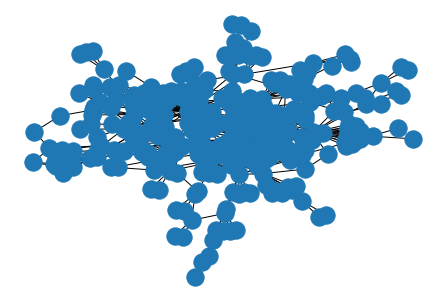

In [32]:
import matplotlib.pyplot as plt
g = nx.from_pandas_edgelist(data, 'source', 'target')
nx.draw(g)
plt.show()

In [35]:
cy.network.create_from_dataframe(data)